<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Modeltf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install joblib
import tensorflow as tf 
import pickle
from sklearn.externals import joblib
import numpy as np
from tensorflow.python.client import device_lib
from tensorflow.saved_model import simple_save
import random
import matplotlib.pyplot as plt 
import math

from sklearn.model_selection import train_test_split
from tensorflow.python import pywrap_tensorflow


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')


In [0]:
#FEATURES AND LABELS  

#LDR 
with open('/content/labelsFinal_withprevpm.bin','rb') as file:
  labels = pickle.load(file)
  
  
with open('/content/featuresFinal_withprevpm (1).bin','rb') as file:
  features = pickle.load(file)

In [3]:
print(np.shape(features))

(2471, 10)


In [0]:
# features =[]
# for i in temp:
#   features.append(list(i))

# labels=[]  
# for i in l:
#   labels.append(list(i))

In [0]:
## TEST SET 

x_train_t, x_test_t,y_train_t, y_test_t = train_test_split(features, labels, test_size = 0.3)

In [5]:
print(np.shape(y_test_t))

(742, 1)


In [0]:
tf.reset_default_graph()

In [7]:
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15911497827033677583
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 261939063946084202
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15344152049425352197
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11326753997
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7863045595521143988
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [9]:

from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(15, input_shape = (10, ), activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1,  activation = 'relu'))

Using TensorFlow backend.
W0821 17:16:54.335856 140407976343424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 17:16:54.342470 140407976343424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 17:16:54.346426 140407976343424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [10]:
#tf.keras.losses.Huber(delta=0.4)
model.compile(optimizer = Adam(lr = 0.001),loss='mse')
model.summary()

W0821 17:16:54.427633 140407976343424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                400       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [11]:
hist = model.fit([x_train_t], [y_train_t], validation_split = 0.33, epochs = 300, verbose = 1, batch_size = 32, shuffle = True)

W0821 17:16:54.577637 140407976343424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0821 17:16:54.678809 140407976343424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1158 samples, validate on 571 samples
Epoch 1/300
1158/1158 [==============================] - 1s 867us/step - loss: 3709.3840 - val_loss: 3708.0893
Epoch 2/300
1158/1158 [==============================] - 0s 146us/step - loss: 3709.3839 - val_loss: 3708.0893
Epoch 3/300
1158/1158 [==============================] - 0s 153us/step - loss: 3709.3839 - val_loss: 3708.0893
Epoch 4/300
1158/1158 [==============================] - 0s 144us/step - loss: 3709.3839 - val_loss: 3708.0893
Epoch 5/300
1158/1158 [==============================] - 0s 140us/step - loss: 3709.3840 - val_loss: 3708.0893
Epoch 6/300
1158/1158 [==============================] - 0s 141us/step - loss: 3709.3840 - val_loss: 3708.0893
Epoch 7/300
1158/1158 [==============================] - 0s 147us/step - loss: 3709.3839 - val_loss: 3708.0893
Epoch 8/300
1158/1158 [==============================] - 0s 148us/step - loss: 3709.3839 - val_loss: 3708.0893
Epoch 9/300
1158/1158 [==============================] - 0s 140us

KeyboardInterrupt: ignored

In [0]:
tr = hist.history['loss']
val_ls = hist.history['val_loss']
plt.plot(tr[1:])
plt.plot(val_ls[1:])

In [0]:
predicted = model.predict([x_test_t])


In [19]:
print(np.shape(y_test_t))
y_test_t=np.reshape(y_test_t, (np.shape(y_test_t)[0],1))
print(np.shape(predicted))

(147, 1)
(147, 1)


In [0]:
# print(np.shape(y_test_t))
##print(np.shape(predicted))

actual =[]
pred=[]
se=0
show = np.hstack((y_test_t, predicted))

for i in show:
  se+=(i[0]-i[1])**2
  actual.append(i[0])
  pred.append(i[1])
  
 




In [0]:
rmse = (se/np.size(y_test_t))**0.5

In [22]:
print(rmse)

11.004678821178647


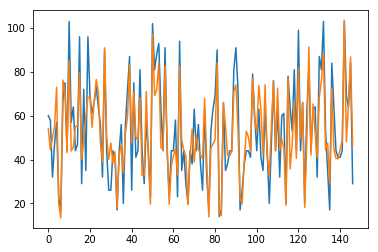

In [23]:
plt.plot(actual)
plt.plot(pred)

In [0]:
print(np.shape(labels))

(2376, 1)


In [0]:
tf.reset_default_graph()

In [8]:
x = tf.placeholder(shape = (None,10), dtype = tf.float32, name = 'input' )
y = tf.placeholder(shape = (None,1), dtype = tf.float32, name = 'target')

#Layer 1 
w1 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((10, 15))), name = 'w1')
b1 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,15))), name = 'b1')

#Layer2 

w2 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((15,25))), name = 'w2')
b2 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,25))), name = 'b2')

#out

wo = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((25,1))), name = 'wo')
bo = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,1))), name = 'bo')


W0821 17:17:30.980701 139809154971520 deprecation.py:506] From <ipython-input-8-efd924619411>:5: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0821 17:17:30.982699 139809154971520 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
hidl1 = tf.add(tf.matmul(x,w1),b1, name ='hidden1')
hidl1 = tf.nn.relu(hidl1)
hidl2 = tf.add(tf.matmul(hidl1,w2),b2, name = 'hidden2')
hidl2 = tf.nn.relu(hidl2)

In [0]:
#outl_batch = tf.compat.v1.layers.batch_normalization(hidl2)
out = tf.add(tf.matmul(hidl2,wo),bo,name = 'output')


In [0]:
loss = tf.reduce_mean(tf.square(tf.subtract(y,out))) 

opt = tf.train.AdamOptimizer(name = 'optimizer')
op_train = opt.minimize(loss, name ='train_op')

  

Add additional custom loss functions if necc 
reducing mean sqaure error 
1. reducing max deviation 

In [0]:
saved = tf.train.Saver().as_saver_def()

In [0]:
init = tf.global_variables_initializer()

3406.9058	4329.571
3828.0215	2354.8416
4632.09	3313.04
3803.5254	2728.021
3569.694	3219.2617
3036.147	4271.119
5057.4014	3683.5122
2492.4458	2906.3892
4639.2715	5337.8174
2229.0037	2956.8628
3055.5928	3421.7056
3269.5913	5348.753
4578.43	3961.896
3456.3813	3285.7378
6202.817	3590.022
2734.7656	4148.3877
3627.582	4482.276
3467.154	5332.1255
2360.7617	3391.7651
2645.5747	4406.7334
2641.6235	4057.0732
6700.029	3337.444
2628.271	2808.967
3235.94	3465.567
4135.665	4543.5527
5166.865	3533.9546
2400.5488	5331.496
2667.2295	4628.307
3448.7551	3562.7754
3494.4346	5632.0107
3418.5645	4124.008
3317.525	4035.8794
2606.7388	4490.0166
3104.7754	4860.831
6314.383	5693.1523
2558.638	3043.5227
3179.7769	2950.8687
3429.8704	5008.1816
3252.918	5640.803
4838.491	4957.287
3375.2	4224.8745
4718.5312	3116.564
3859.1047	3702.0413
3408.9377	4768.3276
2698.796	3513.2979
3123.213	4067.2021
4417.8403	3031.563
3391.4463	2374.2175
3410.4988	3557.0703
4195.8027	3615.0786
2856.0425	3658.2651
4996.0405	3821.138
2516.8

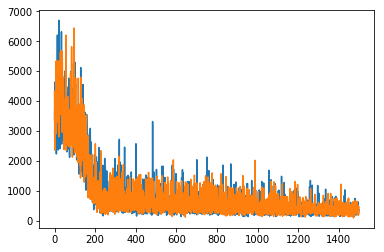

In [14]:

train=[]
val=[]

with tf.device('/device:CPU:0'):
  update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
  save = tf.train.Saver()
  with tf.Session() as sess:
    sess.run(init)
    mini =[]
    for i in range(1500):
      b1=[]
      b2=[]
      l1=[]
      l2=[]
      b1_val=[]
      b2_val=[]
      l1_val=[]
      l2_val=[]
      x_traint, x_test_t,y_traint, y_test_t = train_test_split(features, labels, test_size = 0.3)
      x_trainv, x_testv, y_trainv, y_testv = train_test_split(x_traint, y_traint, test_size = 0.3)
      
      for j in range(16): ##One run is appending 2 random lists 
      
      #TRAINING MINI BATCHES 
        
        seed = random.choice(range(len(x_trainv)))
        i = random.choice(range(len(x_trainv)))
        
        b1.append(x_trainv[seed])
        b2.append(x_trainv[i])
        l1.append(y_trainv[seed])
        l2.append(y_trainv[i])
        
        x_batch = np.vstack((b1,b2))
        y_batch = np.vstack((l1,l2))
        
        ##VALIDATION MINI BATCHES 
        
        seed_val = random.choice(range(len(x_traint)))
        i_val = random.choice(range(len(x_traint)))
        
        b1_val.append(x_traint[seed_val])
        b2_val.append(x_traint[i_val])
        l1_val.append(y_traint[seed_val])
        l2_val.append(y_traint[i_val])
        
        x_batch_val = np.vstack((b1_val,b2_val))
        y_batch_val = np.vstack((l1_val,l2_val))
      
      ## TRAINING LOSS
      update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
      z= sess.run([loss,op_train, update_ops], feed_dict = {x : x_batch, y: y_batch })
      train.append(z[0])
      
      ##VALIDATION LOSS
      
      z_val= sess.run([loss], feed_dict = {x : x_batch_val, y: y_batch_val })
      val.append(z_val[0])
      
      print(str(z[0]) + '\t' + str(z_val[0]))
    
    plt.plot(train)
    plt.plot(val)
    save_path = save.save(sess, "/content/FINAL_GRAPH.ckpt")
    print('Saved model!')
    
 

In [15]:
print(z)

[361.81323, None, []]


In [16]:
print(type(tf.get_default_graph().as_graph_def()))
tf.io.write_graph(tf.get_default_graph().as_graph_def(), '/content/', 'FINAL_GRAPH.pbtxt')

<class 'tensorflow.core.framework.graph_pb2.GraphDef'>


'/content/FINAL_GRAPH.pbtxt'

In [0]:
with open('/content/FINAL_GRAPH.pb', 'wb') as f:
  f.write(tf.get_default_graph().as_graph_def().SerializeToString())
  

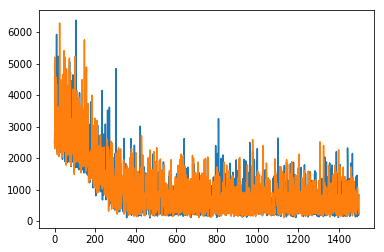

In [0]:
plt.plot(train[1:])
plt.plot(val[1:])

In [17]:
tf.trainable_variables()

[<tf.Variable 'w1:0' shape=(9, 15) dtype=float32_ref>,
 <tf.Variable 'b1:0' shape=(1, 15) dtype=float32_ref>,
 <tf.Variable 'w2:0' shape=(15, 25) dtype=float32_ref>,
 <tf.Variable 'b2:0' shape=(1, 25) dtype=float32_ref>,
 <tf.Variable 'wo:0' shape=(25, 1) dtype=float32_ref>,
 <tf.Variable 'bo:0' shape=(1, 1) dtype=float32_ref>]

In [0]:
## 48 BIT (2253,2315)
'''
features = joblib.load('/content/features48.pkl')
labels = joblib.load('/content/labels48.pkl')
'''

In [0]:
## 16 BIT (2253,267)
'''
features = joblib.load('/content/features16.pkl')
labels = joblib.load('/content/labels16.pkl')
'''